In [52]:
import pandas as pd 

df = pd.read_csv('housepricedata.csv')

df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [53]:
dataset = df.values

In [54]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [55]:
X=dataset[:,0:10]

In [56]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [57]:
Y = dataset[:,10]

In [58]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [59]:
from sklearn import preprocessing

In [60]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)

In [61]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x_scale, Y, test_size=0.3)

In [64]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [65]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [66]:
import tensorflow as tf

In [67]:
from tensorflow.keras.models import Sequential


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [69]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
model = Sequential([
   Dense(32, activation='relu', input_shape=(10,)),
   Dense(32, activation='relu'),
   Dense(1, activation='sigmoid'),
])

In [71]:
model.compile(optimizer='sgd',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [72]:
hist = model.fit(X_train, Y_train,
         batch_size=32, epochs=100,
         validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 76ms/step - loss: 0.7064 - accuracy: 0.4599 - val_loss: 0.7088 - val_accuracy: 0.3379
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.3836 - val_loss: 0.7012 - val_accuracy: 0.3014
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.4051 - val_loss: 0.6953 - val_accuracy: 0.4247
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4961 - val_loss: 0.6906 - val_accuracy: 0.4977
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5176 - val_loss: 0.6866 - val_accuracy: 0.5205
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5108 - val_loss: 0.6828 - val_accuracy: 0.5479
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5205 - val_loss: 0.6797 - val_accuracy: 0.5571
Epoch 8/100


In [73]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2954 - accuracy: 0.9041


[0.2953718304634094, 0.9041095972061157]

In [74]:
import matplotlib.pyplot as plt

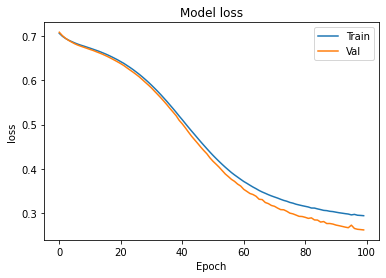

In [75]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

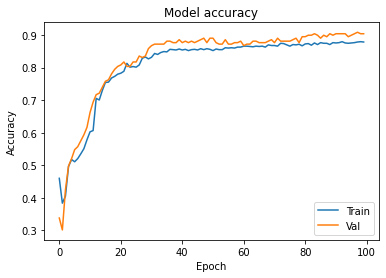

In [76]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [77]:
model_2=Sequential([
   Dense(1000, activation='relu', input_shape=(10,)),
   Dense(1000, activation='relu'),
   Dense(1000, activation='relu'),
   Dense(1000, activation='relu'),
   Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam', 
               loss='binary_crossentropy',
               metrics = ['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
         batch_size=32, epochs=100,
         validation_data=(X_val, Y_val))
            

Epoch 1/100
32/32 [==============================] - 3s 41ms/step - loss: 0.4807 - accuracy: 0.7661 - val_loss: 0.3119 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3576 - accuracy: 0.8591 - val_loss: 0.2719 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3334 - accuracy: 0.8611 - val_loss: 0.2279 - val_accuracy: 0.9132
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3069 - accuracy: 0.8669 - val_loss: 0.2431 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2816 - accuracy: 0.8845 - val_loss: 0.2101 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2897 - accuracy: 0.8796 - val_loss: 0.2383 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2645 - accuracy: 0.8894 - val_loss: 0.2694 - val_accuracy: 0.8904
Epoch 

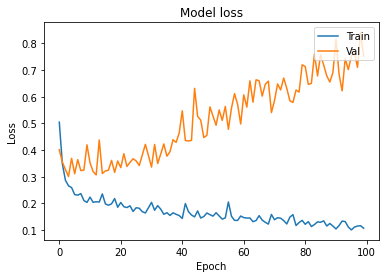

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing(past  the inflection point of Epoch 20). if we plot accuracy using the code below

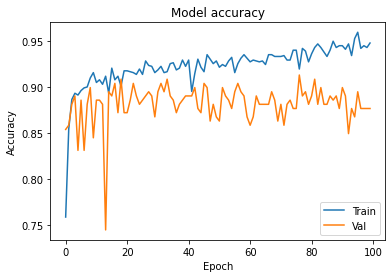

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### We can see a clearer divergence between train and validation accuracy as well:

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 15s 256ms/step - loss: 14.2291 - accuracy: 0.6155 - val_loss: 3.8686 - val_accuracy: 0.7717
Epoch 2/100
32/32 [==============================] - 6s 194ms/step - loss: 1.6942 - accuracy: 0.8004 - val_loss: 0.6909 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 6s 202ms/step - loss: 0.5821 - accuracy: 0.8425 - val_loss: 0.5077 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 6s 193ms/step - loss: 0.5086 - accuracy: 0.8689 - val_loss: 0.5199 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 8s 237ms/step - loss: 0.4759 - accuracy: 0.8777 - val_loss: 0.4652 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 7s 232ms/step - loss: 0.4853 - accuracy: 0.8738 - val_loss: 0.4680 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 7s 227ms/step - loss: 0.4686 - accuracy: 0.8836 - val_loss: 0.4621 - val_accuracy: 0.88

#### We'll get a loss graph that looks like this:

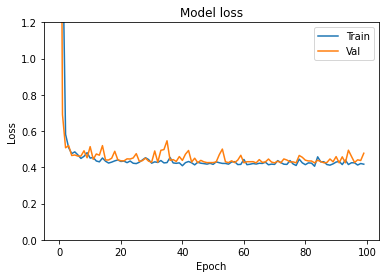

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

#### You can see that the validation loss much more closely matches our training our training loss. Let's plot the accuracy with similar code snippet:

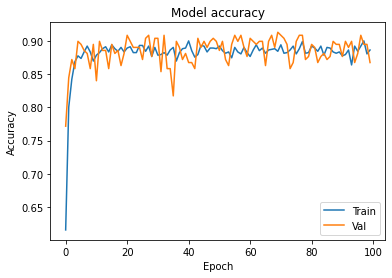

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

And We wikk get a plot like this: